# Housing Data Preparation and Analysis

### Author : AFANDI Soufiane 
#### Linkedin : https://www.linkedin.com/in/afandi-soufiane/
--------------------------------------------------------------------------------------------------------------------------------------

**Project overview :**

I am using the ***Scrapy framework*** to scrape datasets from websites offering real estate listings for sales and rentals. The goal is to analyze this data and develop a ***Machine Learning*** model that ***suggests*** listings to clients based on their preferences and financial capabilities. 

This involves extracting relevant features from the listings, such as location, price, property type, and amenities, and using these features to train a ***recommendation system***. 

The system will leverage data analysis, data science techniques, and business intelligence to provide personalized and financially feasible real estate options for clients. 

This project aims to enhance the user experience and optimize the property search process, ultimately driving better business outcomes for real estate platforms.


**Current Notebook :**

In this notebook i am going to prepare a dataset that i scrapped using Scrapy Framework from ***Mubawab*** and ***Avito*** website.

- Mubawab is a leading real estate portal for Morocco. Rent, buy and sell with ease thanks to the widest choice of real estate.

- Avito is the number 1 platform for selling and purchasing goods and services.

# 1. Setup Environment

In [85]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 281.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 476.3 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 706.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 700.2 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 655.1 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 663.4 kB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AFANDI
[nltk_data]     Soufiane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
english_stop_words = stopwords.words('english')
french_stop_words = stopwords.words('french')
arabic_stop_words = stopwords.words('arabic')

In [4]:
all_stop_words = english_stop_words+french_stop_words+arabic_stop_words

In [5]:
len(all_stop_words)

1090

**Useful Functions :**

In [6]:
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

In [7]:
MOROCCAN_CITIES = [
    "Casablanca", "Rabat", "Fès", "Marrakech", "Agadir", "Tangier", "Meknès",
    "Oujda", "Kenitra", "Tetouan", "Safi", "Khouribga", "Beni Mellal", "El Jadida",
    "Taza", "Nador", "Settat", "Larache", "Ksar El Kebir", "Khemisset", "Guelmim",
    "Errachidia", "Berkane", "Taourirt", "Bouskoura", "Fquih Ben Salah", "Oued Zem",
    "El Kelaa Des Sraghna", "Sidi Slimane", "Guercif", "Oulad Teima", "Ben Guerir",
    "Tifelt", "Lqliaa", "Taroudant", "Sefrou", "Essaouira", "Fnideq", "Sidi Kacem",
    "Tiznit", "Tan-Tan", "Ouarzazate", "Souk El Arbaa", "Youssoufia", "Lahraouyine",
    "Martil", "Ain Harrouda", "Skhirat", "Ouazzane", "Benslimane", "Al Hoceima",
    "Beni Ansar", "M'diq", "Sidi Bennour", "Midelt", "Azrou", "Drargua", "Chefchawn",
    "Zagora", "El Aioun Sidi Mellouk", "Lagouira", "Ras El Ain", "Sidi Ali Ben Hamdouche",
    "Sebt Jahjouh", "Tiddas", "Zaouiat Bougrin", "Tafersit", "Touissit", "Saidia",
    "Lalla Takarkoust", "Skhinate", "Moulay Brahim", "Soualem", "Gueznaia", "Moulay Yacoub",
    "Sidi Allal Tazi", "Laakarta", "Alnif", "Dar El Kebdani", "Jebha", "Ain Erreggada",
    "Sidi Addi", "Skoura", "Smimou", "Ain Jemaa", "Timahdite", "Aït Dawd", "Souk EL Had",
    "Had Bouhssoussen", "Oulad Said", "Arbaoua", "Ain Dorij", "Madagh", "Tighza", "Matmata",
    "Kourouna"
]

# 2. Import Data

In [8]:
mh_dataset = pd.read_csv('market housing full data exported at 19-05-2024 - mubawab and avito.csv')

In [9]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


**Overview :** 

The above dataset that i have scrapped using Scrapy Framework took me 3-4 days (~ 1h per day = 3-4 hours in general), on two real estate websites in Morroco (Avito - Mubawab), just to start using data cleaning process so that i can automate this process in the future.

**Data Description :**

This dataset contains :

- *<u>advertisement_url</u>* : Which is the full URL of the page in the website on which i retrieve detailed information on the current real estate announcement.

- *<u>title</u>* : The title of the property advertisement.

- *<u>publication_date</u>* : The date the advertisement was published by its owner.

- *<u>price</u>* : The price of the property (in ***DH*** = Moroccan ***D***ir***H***am : the official monetary currency of Morocco).

- *<u>location</u>* : The exact location of the property.

- *<u>description</u>* : Detail parts of the property.
 
- *<u>complete_description</u>* : Complete description of the property established by its owner.

- *<u>features_list</u>* : A liste of The property type (Apartment, House, Villa, farmhouse, ...),  property state, number of floors ...

- *<u>insert_date</u>* : The Date the current announcement was scrapped.

In [10]:
mh_dataset.shape

(1734, 9)

In [11]:
mh_dataset.isnull().sum()

advertisement_url          0
title                      0
publication_date           0
price                      0
location                   0
description             1076
complete_description       0
features_list              0
insert_date                0
dtype: int64

**Notice :**

The 1076 rows which have null value in 'description' field, were caused because of the scrape failure. (Scrapy can't scrap svg element ... but i still work on it for future updates, trying to solve it using Selenium with Scrapy).

In [12]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   advertisement_url     1734 non-null   object
 1   title                 1734 non-null   object
 2   publication_date      1734 non-null   object
 3   price                 1734 non-null   object
 4   location              1734 non-null   object
 5   description           658 non-null    object
 6   complete_description  1734 non-null   object
 7   features_list         1734 non-null   object
 8   insert_date           1734 non-null   object
dtypes: object(9)
memory usage: 122.1+ KB


# 3. Data Cleaning

## 3.1 Remove duplicate records

We'll start by checking overall duplicates records in my dataset.

In [13]:
sum(mh_dataset.duplicated())

0

We found **no duplicate records** in our dataset, but **I believe this does not reflect reality**. If two records are essentially the same but differ in just one field <i>**[**<u>which in this case is going to be 'advertisement_url</u>**]**</i>, they are not identified as duplicates. In practice, some people **repost** their real estate ads multiple times on these websites, causing them to appear multiple times for visitors.

In [14]:
sum(mh_dataset['advertisement_url'].duplicated())

186

we found 66 duplicate records.

In [15]:
mh_dataset = mh_dataset[~mh_dataset['advertisement_url'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [16]:
sum(mh_dataset['advertisement_url'].duplicated())

0

Let's delve deeper into our dataset and examine other columns for potential duplicates. I will focus on the 'title' column because individuals tend to repost the same ad multiple times with identical or very similar titles. By analyzing this column, we might identify records that are essentially duplicates despite differences in other fields.

In [17]:
sum(mh_dataset['title'].duplicated())

66

As we say, we found 66 duplicate records.

In [18]:
mh_dataset[mh_dataset['title'].duplicated()]

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
64,https://www.mubawab.ma/fr/pa/7589605/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
125,https://www.mubawab.ma/fr/pa/7589610/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
139,https://www.mubawab.ma/fr/pa/7779139/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 092 000 DH,Centre Ville à Mohammedia,84 m² ;3 Pièces;2 Chambres;1 Salle de bain,"RESIDENCE NATURA LIVING, une résidence verdoya...",Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-17
150,https://www.mubawab.ma/fr/a/7892102/appartemen...,Appartement à vendre,Publié aujourdhui,1 300 000 DH,Ain Chock à Casablanca,114 m² ;6 Pièces;3 Chambres;1 Salle de bain,Je mets en vente un appartement de 114m² à Ain...,Type de bien;Appartement;Etat ;À rénover;Etat ...,2024-05-17
172,https://www.mubawab.ma/fr/pa/7589596/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
...,...,...,...,...,...,...,...,...,...
1425,https://www.avito.ma/fr/tinghir/terrains_et_fe...,Terrain à vendre,il y a 14 heures,Prix non spécifié,Tinghir,NaN,"Terrain à vendre à Tinghir, Douar Ouaklim : - ...","Type;Terrains et Fermes, à vendre;Secteur;Tout...",2024-05-19
1430,https://www.avito.ma/fr/autre_secteur/appartem...,Appartement à louer 80 m² à Temara,il y a 14 heures,3 000 DH,Temara,NaN,temara tres belle apprt a louer au2 ERE 2 piec...,"Type;Appartements, à louer;Secteur;Autre secte...",2024-05-19
1468,https://www.avito.ma/fr/hay_hassani/appartemen...,Appartement à vendre,il y a 14 heures,Prix non spécifié,Casablanca,NaN,Appartement À vendre situé à hay hassani( Rési...,"Type;Appartements, à vendre;Secteur;Hay Hassan...",2024-05-19
1480,https://www.avito.ma/fr/centre_ville/apparteme...,Appartement à louer 80 m² à Temara,il y a 14 heures,3 000 DH,Temara,NaN,a louer tres belle apprt au 2ere etage 2 piece...,"Type;Appartements, à louer;Secteur;Centre Vill...",2024-05-19


**As we notice here, there are duplicate records. and it must be deleted so as not to distort our analysis in the future.**

In [19]:
mh_dataset = mh_dataset[~mh_dataset['title'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [20]:
sum(mh_dataset['title'].duplicated())

0

We have finished our examination using the 'title' column. Now, let's move on to analyzing the 'description' column. This analysis might help us identify additional duplicates, as individuals who repost their ads often use the same or very similar descriptions.

Note: We are not examining the 'price,' 'surface,' 'location,' or 'publication_date' columns because multiple real estate listings can have the same price, surface area, location, or publication date.

In [21]:
sum(mh_dataset['description'].duplicated())

1133

In [22]:
mh_dataset[mh_dataset['description'].duplicated()][:2]

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
18,https://www.mubawab.ma/fr/pa/6854086/apparteme...,"Appartement de 125m² en vente, Eden Island Bou...",Publié aujourdhui,2 820 000 DH,Plage Oued Cherrat à Bouznika,125 m² ;4 Pièces;3 Chambres;2 Salles de bains,"Découvrez « EDEN ISLAND », une réalisation Uni...",Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-17
39,https://www.mubawab.ma/fr/pa/7676273/vend-appa...,Vend appartement à Tanja Balia. Surface de 125...,Publié aujourdhui,1 500 000 DH,Tanja Balia à Tanger,125 m² ;4 Pièces;3 Chambres;2 Salles de bains,Ne laissez pas passer cet appartement à vendre...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17


**The "description" column is not as reliable as the "title" column for detecting duplicate records. As we observed earlier, even when two records have the same "description," they can still be different ads. Therefore, relying on the "description" column might not be effective for identifying duplicates in our dataset.**

## 3.2 remove '\n' and '\t' characters in the dataset

===> This code bloc is disabled for future commits ... because, i've automated this data cleaning process inside the spider using **ItemLoaders**.

In [20]:
# mh_dataset['title'] = mh_dataset['title'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['publication_date'] = mh_dataset['publication_date'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['price'] = mh_dataset['price'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['location'] = mh_dataset['location'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['description'] = mh_dataset['description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['complete_description'] = mh_dataset['complete_description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['features_list'] = mh_dataset['features_list'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))

## 3.3 Fix the shifted values issue in some lines

===> This problem may appear sometimes...so it is necessary to check and resolve it.

In [47]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
id,,,,,,,,,
1,https://www.mubawab.ma/fr/pa/7779122/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 034 750 DH,Centre Ville à Mohammedia,83 m² ;3 Pièces;2 Chambres;1 Sa...,"<p>RESIDENCE NATURA LIVING, une résidence verd...",Jardin;Terrasse;Garage;Ascenseur;Piscine;Conci...,2024-04-30
2,https://www.mubawab.ma/fr/pa/6292037/apparteme...,"Appartement de 94m² 3 chambre en vente, Rio Be...",Publié aujourdhui,11 000 DH,Sidi Rahal,94 m² ;4 Pièces;3 Chambres;2 Sa...,"<p>Agréable appartement à vendre. 4 pièces, 3 ...",Jardin;Terrasse;Garage;Vue sur mer;Piscine;Con...,2024-04-30
3,https://www.mubawab.ma/fr/pa/7203490/apparteme...,"Appartement de 100 m² en vente, Eden Island Bo...",Publié aujourdhui,2 200 000 DH,Plage Oued Cherrat à Bouznika,100 m² ;3 Pièces;2 Chambres;1 S...,"<p>Découvrez « EDEN ISLAND », une réalisation ...",Orientation: Sud ...,2024-04-30
4,https://www.mubawab.ma/fr/pa/7617451/apparteme...,Appartement 55m² en vente Riad Assalam,Publié aujourdhui,250 000 DH,Al Aalia à Mohammedia,55 m² ;4 Pièces;3 Chambres;1 Sa...,<p>Achetez l'appartement de vos rêves au milie...,Ascenseur,2024-04-30
5,https://www.mubawab.ma/fr/pa/7859027/superbe-a...,Superbe appartement à vendre à Boukhalef. 2 ch...,Publié aujourdhui,"N,Boukhalef à Tanger """,72 m² ;3 Pièces;2 Chambres;2 Sa...,"<p>Appartement idéal à la vente. 3 pièces, 2 s...",Jardin;Concierge;Sécurité;Cuisine équipée,2024-04-30,NaN


In [28]:
# check if there is some records with this issue by executing this command line ...
# sum(mh_dataset['insert_date'].isna())

----------------------------------------------------------------------------------------------------
(***!***) **As what we can notice here :** 
- That "*insert_data*" value is "*NaN*", but in reality it's in the wrong field "*features_list*".
- Also the field "*complete_description*" has the value of "*features_list*" field.
- and so on ...

so from the "*price*" field until "*insert_date*" field, the values were shifted.

to solve this issue we gonna use the next code bloc:

In [29]:
def is_shifted(row):
    """
    Check if current line is shifted or not.
    """
    date_pattern = r"^\d{4}-\d{2}-\d{2}$"
    
    if str(row['insert_date']) == 'nan' and re.match(r"^\d{4}-\d{2}-\d{2}$" , str(row['features_list'])):
        return True
    return False

In [30]:
 def fix_shift(row):
        row.loc["price": "insert_date"] = row.loc["price": "insert_date"].shift(1)
        row.loc["price"] = "nan" 
        return row

In [31]:
def detect_and_fix_shifted_rows(dataframe):
    corrected_df = dataframe.copy()
    for index, row in dataframe.iterrows():
        if is_shifted(row):
            corrected_df.loc[index] = fix_shift(row)
    
    return corrected_df

In [169]:
print("Original DataFrame:")
mh_dataset.head()

Original DataFrame:


,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
id,,,,,,,,,
1,https://www.mubawab.ma/fr/pa/7779122/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 034 750 DH,Centre Ville à Mohammedia,83 m² ;3 Pièces;2 Chambres;1 Sa...,"<p>RESIDENCE NATURA LIVING, une résidence verd...",Jardin;Terrasse;Garage;Ascenseur;Piscine;Conci...,2024-04-30
2,https://www.mubawab.ma/fr/pa/6292037/apparteme...,"Appartement de 94m² 3 chambre en vente, Rio Be...",Publié aujourdhui,11 000 DH,Sidi Rahal,94 m² ;4 Pièces;3 Chambres;2 Sa...,"<p>Agréable appartement à vendre. 4 pièces, 3 ...",Jardin;Terrasse;Garage;Vue sur mer;Piscine;Con...,2024-04-30
3,https://www.mubawab.ma/fr/pa/7203490/apparteme...,"Appartement de 100 m² en vente, Eden Island Bo...",Publié aujourdhui,2 200 000 DH,Plage Oued Cherrat à Bouznika,100 m² ;3 Pièces;2 Chambres;1 S...,"<p>Découvrez « EDEN ISLAND », une réalisation ...",Orientation: Sud ...,2024-04-30
4,https://www.mubawab.ma/fr/pa/7617451/apparteme...,Appartement 55m² en vente Riad Assalam,Publié aujourdhui,250 000 DH,Al Aalia à Mohammedia,55 m² ;4 Pièces;3 Chambres;1 Sa...,<p>Achetez l'appartement de vos rêves au milie...,Ascenseur,2024-04-30
5,https://www.mubawab.ma/fr/pa/7859027/superbe-a...,Superbe appartement à vendre à Boukhalef. 2 ch...,Publié aujourdhui,"N,Boukhalef à Tanger """,72 m² ;3 Pièces;2 Chambres;2 Sa...,"<p>Appartement idéal à la vente. 3 pièces, 2 s...",Jardin;Concierge;Sécurité;Cuisine équipée,2024-04-30,NaN


In [170]:
if sum(mh_dataset['insert_date'].isna()) > 0 :
    mh_dataset = detect_and_fix_shifted_rows(mh_dataset)
    print("\nCorrected DataFrame:")
mh_dataset.head()


Corrected DataFrame:


,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
id,,,,,,,,,
1,https://www.mubawab.ma/fr/pa/7779122/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 034 750 DH,Centre Ville à Mohammedia,83 m² ;3 Pièces;2 Chambres;1 Sa...,"<p>RESIDENCE NATURA LIVING, une résidence verd...",Jardin;Terrasse;Garage;Ascenseur;Piscine;Conci...,2024-04-30
2,https://www.mubawab.ma/fr/pa/6292037/apparteme...,"Appartement de 94m² 3 chambre en vente, Rio Be...",Publié aujourdhui,11 000 DH,Sidi Rahal,94 m² ;4 Pièces;3 Chambres;2 Sa...,"<p>Agréable appartement à vendre. 4 pièces, 3 ...",Jardin;Terrasse;Garage;Vue sur mer;Piscine;Con...,2024-04-30
3,https://www.mubawab.ma/fr/pa/7203490/apparteme...,"Appartement de 100 m² en vente, Eden Island Bo...",Publié aujourdhui,2 200 000 DH,Plage Oued Cherrat à Bouznika,100 m² ;3 Pièces;2 Chambres;1 S...,"<p>Découvrez « EDEN ISLAND », une réalisation ...",Orientation: Sud ...,2024-04-30
4,https://www.mubawab.ma/fr/pa/7617451/apparteme...,Appartement 55m² en vente Riad Assalam,Publié aujourdhui,250 000 DH,Al Aalia à Mohammedia,55 m² ;4 Pièces;3 Chambres;1 Sa...,<p>Achetez l'appartement de vos rêves au milie...,Ascenseur,2024-04-30
5,https://www.mubawab.ma/fr/pa/7859027/superbe-a...,Superbe appartement à vendre à Boukhalef. 2 ch...,Publié aujourdhui,nan,"N,Boukhalef à Tanger """,72 m² ;3 Pièces;2 Chambres;2 Sa...,"<p>Appartement idéal à la vente. 3 pièces, 2 s...",Jardin;Concierge;Sécurité;Cuisine équipée,2024-04-30


In [172]:
sum(mh_dataset['insert_date'].isna())

0

## 3.4 'advertisement_url' column cleaning

**Summary :**

- Added a new column based on current column 'advertisement_url'.
- Visualize the number of records per website.

In [23]:
mh_dataset['advertisement_url']

0       https://www.mubawab.ma/fr/pa/7476862/apparteme...
1       https://www.mubawab.ma/fr/a/7915969/luxueux-st...
2       https://www.mubawab.ma/fr/a/7916043/studio-de-...
3       https://www.mubawab.ma/fr/a/7916424/vente-appa...
4       https://www.mubawab.ma/fr/a/7916833/bel-appart...
                              ...                        
1477    https://www.avito.ma/fr/maarif/appartements/43...
1478    https://www.avito.ma/fr/hay_riad/appartements/...
1479    https://www.avito.ma/fr/centre_ville/locations...
1480    https://www.avito.ma/fr/marjane/appartements/a...
1481    https://www.avito.ma/fr/route_de_sefrou/terrai...
Name: advertisement_url, Length: 1482, dtype: object

**The first step I will take is to gather the website names and create a new column in the dataset to indicate the website each ad belongs to. This additional information can help us better analyze and manage the data.**

In [24]:
mh_dataset['origin_website'] = mh_dataset['advertisement_url'].apply(lambda x: x.split('.')[1])

In [25]:
mh_dataset['origin_website'].describe()

count      1482
unique        2
top       avito
freq       1050
Name: origin_website, dtype: object

In [26]:
mh_dataset['origin_website'].unique()

array(['mubawab', 'avito'], dtype=object)

In [27]:
highest_count  =  {
    "name" : "avito",
    "value": mh_dataset[mh_dataset['origin_website'] == 'avito'].shape[0]
}

lowest_count = {
    "name" : "mubawab",
    "value": mh_dataset[mh_dataset['origin_website'] == 'mubawab'].shape[0]
}

r = (100 * (highest_count["value"] - lowest_count["value"])) / highest_count["value"]

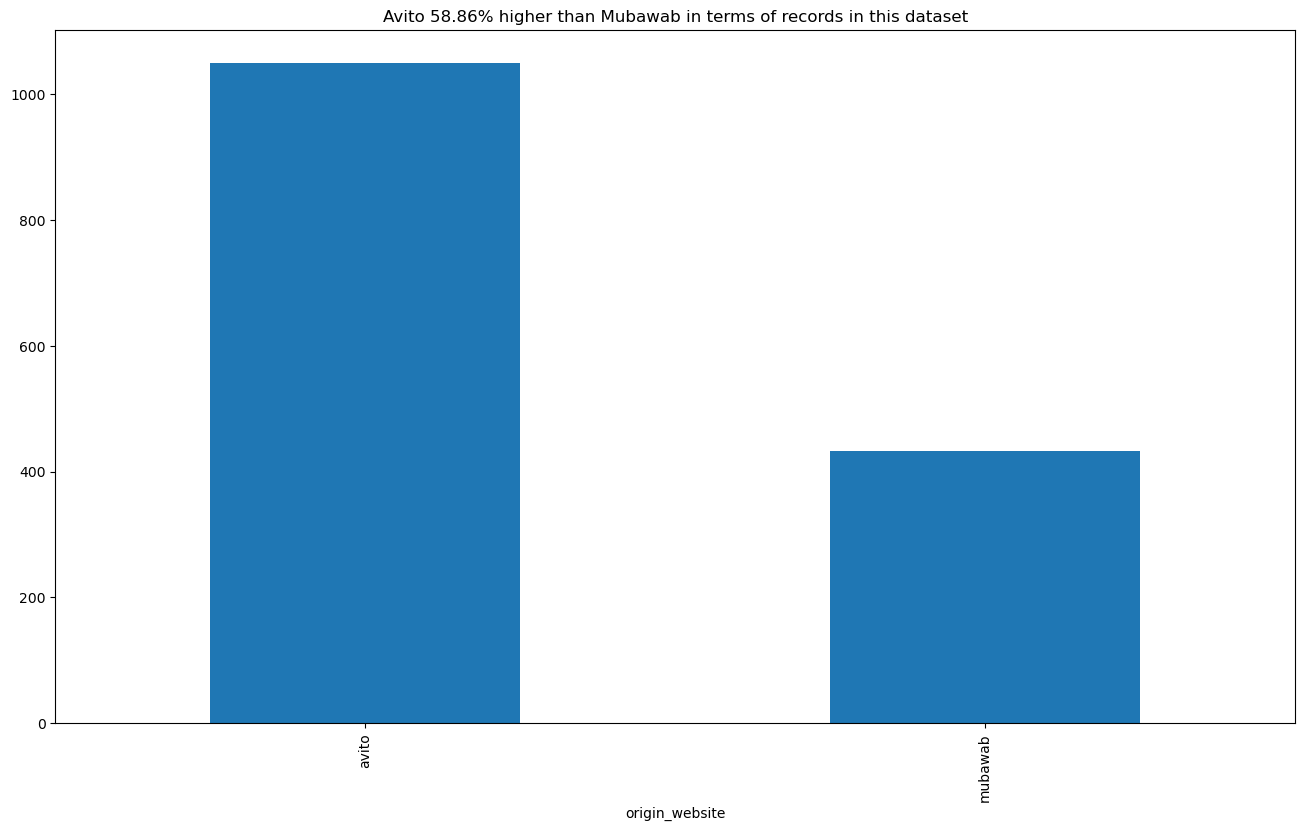

In [28]:
mh_dataset['origin_website'].value_counts().plot(kind='bar')
plt.title(f"{highest_count['name'].capitalize()} {round(r, 2)}% higher than {lowest_count['name'].capitalize()} in terms of records in this dataset")
plt.show()

## 3.5 'title' column cleaning

**Summary :**

- Added a new column 'the surface area of the property from the title (m²)' based on current column 'title'.
- Analyse all titles by counting the most appeared words.
- Added a new column 'announcement type from the title' based on current column 'title'.
- Analyse the new column 'the surface area of the property from the title (m²)', and gather new insight from it.
- Adde new column 'size of the property' (very small, small, average, big, very big) based on current column 'title'.

In [29]:
mh_dataset['title']

0            Appartement de 100m² en vente Noor Asilah 
1       Luxueux studio à vendre 63m² La Ferme Bretonne 
2       Studio de Luxe à Palmier 1ère étage, Ascenseur 
3                             Vente appartement rénové 
4                             Bel appartement spacieux 
                             ...                       
1477     43458-Vente Appt à Casablanca Maarif de 166 m²
1478                Appartement à vendre 178 m² à Rabat
1479                        des appartements par jours 
1480                       appartement meublé a vendre 
1481                  Terrain de 12.8 Ha à FES Ain Bida
Name: title, Length: 1482, dtype: object

### 3.5 - 1/ Counting Unique Words :

I will create a "word counts" dictionary which will contain all ***unique words*** as keys and ***their occurrences*** as values.

This step will give us an ***overall overview*** of the titles in this dataset.

In [30]:
def get_unique_words(list, stop_words):
    # Combine all texts into one
    combined_text = " ".join(list)

    # Converte text to lowercase to ensure word comparison is not case sensitive + delete any character that is not a letter, number, or space.
    combined_text = re.sub(r'[^\w\s]', ' ', combined_text.lower())

    # Retrieve all words in the test
    words = combined_text.split()

    # Count the occurrences of each word
    unique_words_dict = Counter(words)

    filtered_dict = {key: value for key, value in unique_words_dict.items() if key not in stop_words}
    
    return filtered_dict

In [31]:
unique_words_from_titles = dict(get_unique_words(list(mh_dataset['title']), all_stop_words))

In [32]:
len(unique_words_from_titles)

1603

In [33]:
unique_words_from_titles = {k: v for k, v in unique_words_from_titles.items() if v>1 and not has_numbers(k) and k.capitalize() not in MOROCCAN_CITIES }

In [34]:
len(unique_words_from_titles)

478

In [35]:
sorted_unique_words_from_titles = sorted(unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

In [36]:
sorted_unique_words_from_titles

[('appartement', 837),
 ('vendre', 515),
 ('m²', 391),
 ('louer', 153),
 ('vente', 143),
 ('chambres', 137),
 ('villa', 127),
 ('terrain', 92),
 ('meublé', 66),
 ('studio', 63),
 ('bel', 62),
 ('location', 59),
 ('surface', 54),
 ('résidence', 48),
 ('hay', 46),
 ('centre', 40),
 ('للبيع', 40),
 ('al', 37),
 ('el', 36),
 ('standing', 35),
 ('superbe', 32),
 ('ville', 30),
 ('haut', 30),
 ('شقة', 30),
 ('totale', 29),
 ('bureau', 28),
 ('maison', 27),
 ('neuf', 26),
 ('superficie', 25),
 ('quartier', 25),
 ('terrasse', 23),
 ('piscine', 23),
 ('luxe', 21),
 ('bouznika', 21),
 ('belle', 21),
 ('vue', 20),
 ('commercial', 20),
 ('tanger', 19),
 ('belles', 19),
 ('magasin', 19),
 ('californie', 18),
 ('mohammedia', 18),
 ('jardin', 18),
 ('hôpitaux', 18),
 ('très', 18),
 ('rak', 18),
 ('appart', 17),
 ('titré', 17),
 ('gueliz', 17),
 ('ferme', 16),
 ('bien', 16),
 ('sidi', 16),
 ('bd', 16),
 ('شقق', 16),
 ('local', 16),
 ('temara', 16),
 ('gauthier', 15),
 ('vend', 15),
 ('salon', 15),
 ('

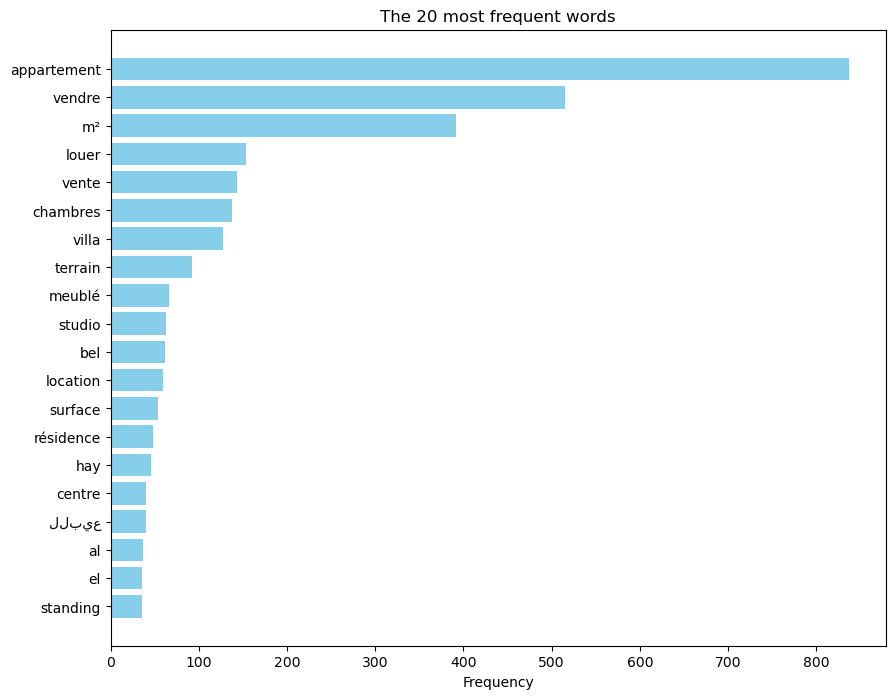

In [37]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

In [38]:
from wordcloud import WordCloud

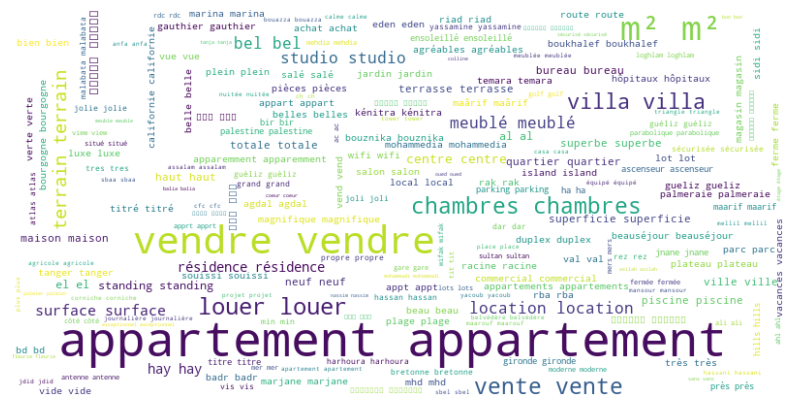

In [39]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
specific_stop_words = {"m²", "bel", "al", "el", "très", "bien", "hay","haut","belles","quartier","eden","vue","belle","badr","sidi","db","rak","racine","في","pièces","magnifique","beau","mhd","val","agréable","hills","lot","apparemment","plein","route","jnane"}

In [41]:
sorted_unique_words_from_titles = {key: value for key, value in dict(sorted_unique_words_from_titles).items() if key not in specific_stop_words}
sorted_unique_words_from_titles = sorted(sorted_unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

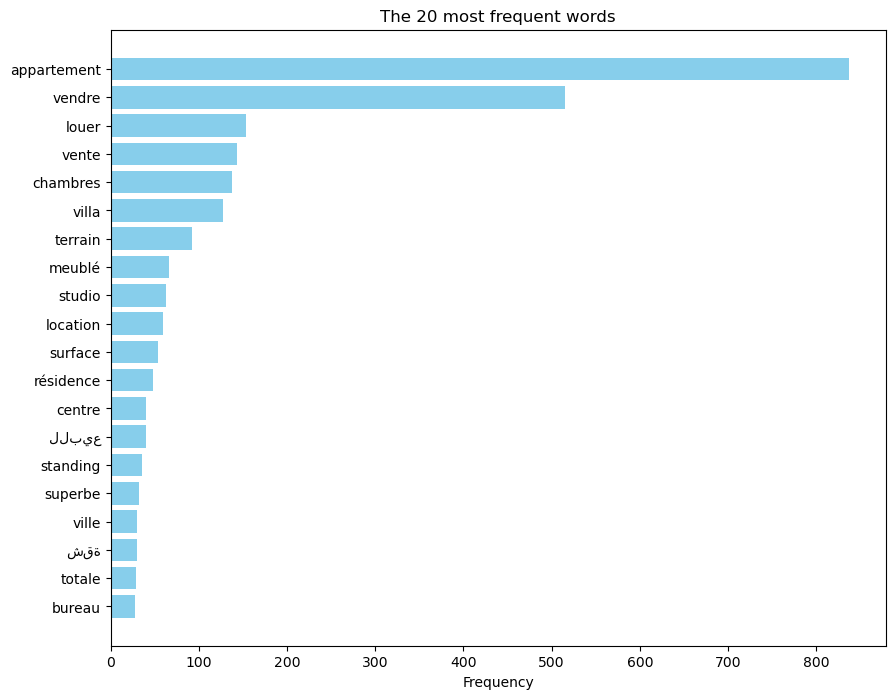

In [42]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

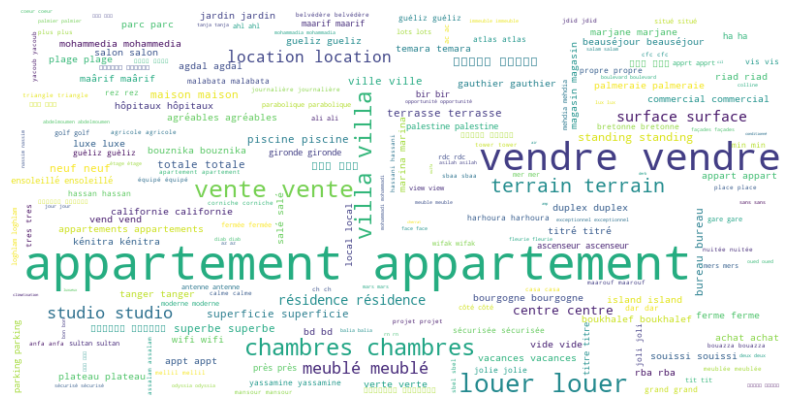

In [43]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3.5 - 2/ Extract the type of the ad (vente/louer/rental/sell/...) from the title :

In [44]:
sorted_unique_words_from_titles

[('appartement', 837),
 ('vendre', 515),
 ('louer', 153),
 ('vente', 143),
 ('chambres', 137),
 ('villa', 127),
 ('terrain', 92),
 ('meublé', 66),
 ('studio', 63),
 ('location', 59),
 ('surface', 54),
 ('résidence', 48),
 ('centre', 40),
 ('للبيع', 40),
 ('standing', 35),
 ('superbe', 32),
 ('ville', 30),
 ('شقة', 30),
 ('totale', 29),
 ('bureau', 28),
 ('maison', 27),
 ('neuf', 26),
 ('superficie', 25),
 ('terrasse', 23),
 ('piscine', 23),
 ('luxe', 21),
 ('bouznika', 21),
 ('commercial', 20),
 ('tanger', 19),
 ('magasin', 19),
 ('californie', 18),
 ('mohammedia', 18),
 ('jardin', 18),
 ('hôpitaux', 18),
 ('appart', 17),
 ('titré', 17),
 ('gueliz', 17),
 ('ferme', 16),
 ('bd', 16),
 ('شقق', 16),
 ('local', 16),
 ('temara', 16),
 ('gauthier', 15),
 ('vend', 15),
 ('salon', 15),
 ('riad', 15),
 ('achat', 14),
 ('duplex', 14),
 ('appartements', 14),
 ('bourgogne', 14),
 ('appt', 13),
 ('plage', 13),
 ('vide', 13),
 ('plateau', 13),
 ('island', 12),
 ('marjane', 12),
 ('palmeraie', 12),
 

In [45]:
ad_type_normalisation = {
  "sell": "sell",
  "sole": "sell",
  "selling": "sell",
  "vend": "sell",
  "vendre": "sell",
  "rental": "rental",
  "renting": "rental",
  "location": "rental",
  "louer": "rental",
  "كراء": "rental",
  "loue": "rental",
}

In [46]:
def gather_announcement_type(title, dictionary):
    words = title.lower().split()
    for word in words:
        normalized_word = dictionary.get(word, None)
        if normalized_word:
            return normalized_word
    return 'others'

In [47]:
mh_dataset['ad category from title'] = mh_dataset['title'].apply(lambda x: gather_announcement_type(x, ad_type_normalisation))

<Axes: xlabel='ad category from title'>

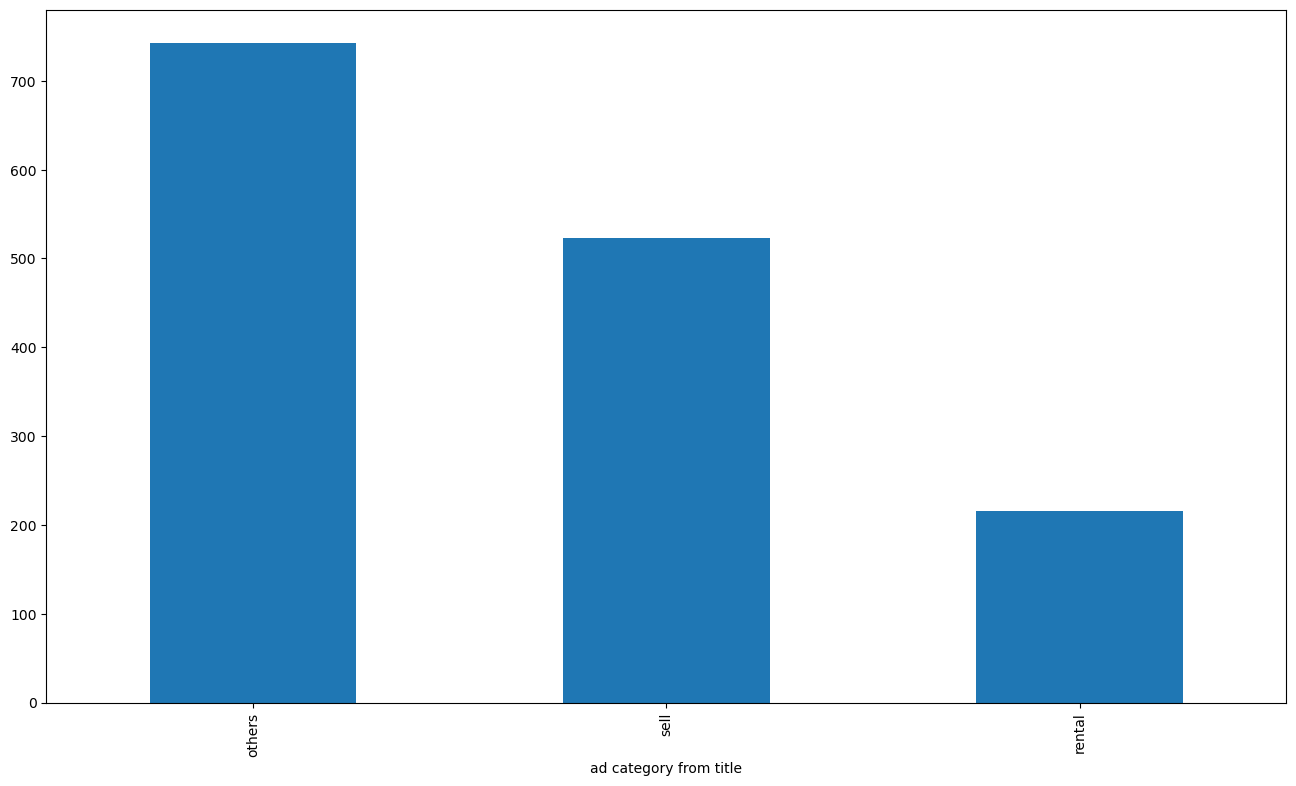

In [48]:
mh_dataset['ad category from title'].value_counts().plot(kind="bar")

We need more informations from other columns to identify the category of others type of ads.

### 3.5 - 3/ Extract the surface area of the property from the title :

In [49]:
property_surface_pattern = r'\b(\d+)\s*m²\b'
def return_property_surface_from_text(text):
    match = re.search(property_surface_pattern, text)
    if match:
        # return match.group(0).split("m²")[0].replace(" ", "")+" m²" # if we want to keep the unit of measurement (m²).
        return int(match.group(0).split("m²")[0].replace(" ", ""))
    else:
        return None

In [50]:
mh_dataset['the surface area of the property from the title (m²)'] = mh_dataset['title'].apply(lambda x: return_property_surface_from_text(x))

In [51]:
mh_dataset['the surface area of the property from the title (m²)']

0       100.0
1        63.0
2         NaN
3         NaN
4         NaN
        ...  
1477    166.0
1478    178.0
1479      NaN
1480      NaN
1481      NaN
Name: the surface area of the property from the title (m²), Length: 1482, dtype: float64

In [52]:
len(mh_dataset['the surface area of the property from the title (m²)'][mh_dataset['the surface area of the property from the title (m²)'].isna() == True])

1002

In [53]:
len(mh_dataset['the surface area of the property from the title (m²)'][mh_dataset['the surface area of the property from the title (m²)'].isna() == False])

480

In [54]:
mh_dataset[['the surface area of the property from the title (m²)', 'origin_website']].head(3)

,the surface area of the property from the title (m²),origin_website
0,100.0,mubawab
1,63.0,mubawab
2,NaN,mubawab


In [55]:
sub_set = mh_dataset[['the surface area of the property from the title (m²)', 'origin_website']]

In [56]:
sub_set['the surface area of the property from the title (m²)'].describe()

count     480.000000
mean      184.952083
std       551.283630
min         4.000000
25%        75.000000
50%        95.000000
75%       132.000000
max      9500.000000
Name: the surface area of the property from the title (m²), dtype: float64

In [57]:
sub_set = sub_set[sub_set['the surface area of the property from the title (m²)']  < 1000 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


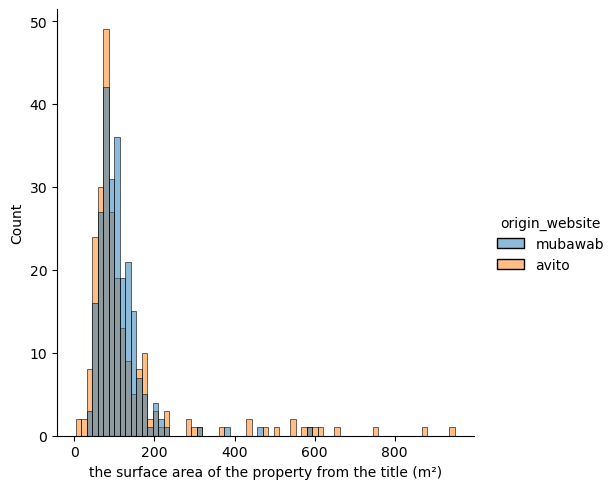

In [58]:
sns.displot(sub_set, x='the surface area of the property from the title (m²)', hue='origin_website')

In [59]:
sub_set = sub_set[sub_set['the surface area of the property from the title (m²)']  < 300 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

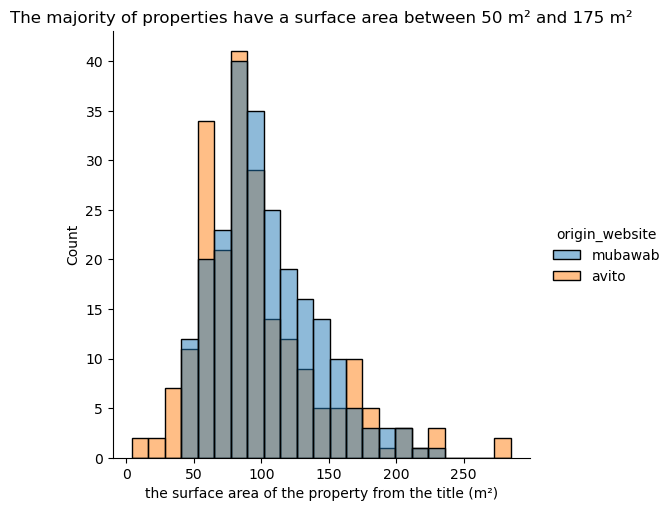

In [60]:
sns.displot(sub_set, x='the surface area of the property from the title (m²)', hue='origin_website')
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

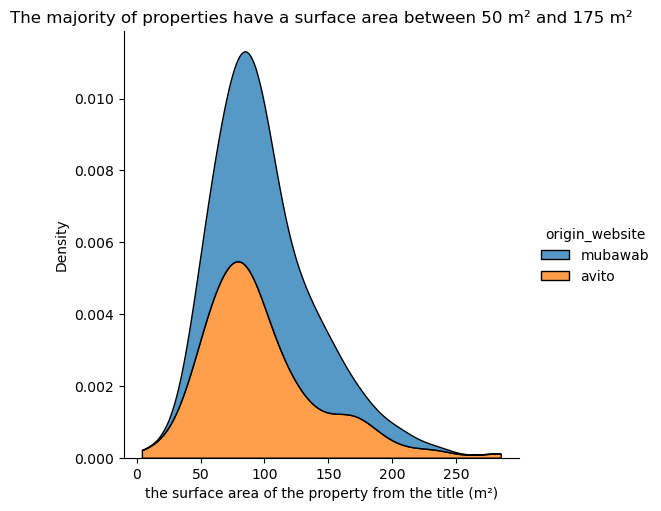

In [61]:
# Kernel density estimation
sns.displot(sub_set, x='the surface area of the property from the title (m²)', hue='origin_website', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

## 3.6 'publication_date' column cleaning

**Summary :**

- Added year, month, day of publication columns based on current column 'publication_date' and 'insert_date'.

In [62]:
mh_dataset['publication_date']

0       Publié aujourdhui
1       Publié aujourdhui
2       Publié aujourdhui
3       Publié aujourdhui
4       Publié aujourdhui
              ...        
1477     il y a 15 heures
1478     il y a 15 heures
1479     il y a 15 heures
1480     il y a 15 heures
1481     il y a 15 heures
Name: publication_date, Length: 1482, dtype: object

In [63]:
mh_dataset['publication_date'].unique()

array(['Publié aujourdhui', 'il y a 8 minutes', 'il y a 9 minutes',
       'il y a 21 minutes', 'il y a 26 minutes', 'il y a 20 minutes',
       'il y a 24 minutes', 'il y a 18 minutes', 'il y a 16 minutes',
       'il y a 33 minutes', 'il y a 28 minutes', 'il y a 29 minutes',
       'il y a 31 minutes', 'il y a 30 minutes', 'il y a 36 minutes',
       'il y a 37 minutes', 'il y a 41 minutes', 'il y a 35 minutes',
       'il y a 32 minutes', 'il y a 43 minutes', 'il y a 40 minutes',
       'il y a 45 minutes', 'il y a 39 minutes', 'il y a 42 minutes',
       'il y a 50 minutes', 'il y a 44 minutes', 'il y a 57 minutes',
       'il y a 56 minutes', 'il y a 55 minutes', 'il y a 59 minutes',
       'il y a 54 minutes', 'il y a 58 minutes', 'il y a 52 minutes',
       'il y a 1 heure', 'il y a 53 minutes', 'il y a 2 heures',
       'il y a 3 heures', 'il y a 4 heures', 'il y a 5 heures',
       'il y a 6 heures', 'il y a 7 heures', 'il y a 8 heures',
       'il y a 9 heures', 'il y a 10 he

In [64]:
def convert_to_datetime(pub_date, insert_date):
    current_date = datetime.strptime(insert_date, "%Y-%m-%d")
    if pub_date == 'Publié aujourdhui':
        return current_date
    elif 'minute' in pub_date:
        return current_date
    elif 'heure' in pub_date:
        hours = int(pub_date.split()[3])
        if hours >= 24:
            return current_date + timedelta(hours=hours)
        else:
            return current_date
    else:
        return np.nan

In [65]:
mh_dataset.apply(lambda x: convert_to_datetime(x['publication_date'], x['insert_date']), axis=1)

0      2024-05-17
1      2024-05-17
2      2024-05-17
3      2024-05-17
4      2024-05-17
          ...    
1477   2024-05-19
1478   2024-05-19
1479   2024-05-19
1480   2024-05-19
1481   2024-05-19
Length: 1482, dtype: datetime64[ns]

In [66]:
mh_dataset['publication_date'] = mh_dataset.apply(lambda x: convert_to_datetime(x['publication_date'], x['insert_date']), axis=1)

In [67]:
mh_dataset['year of publication'] = mh_dataset['publication_date'].apply(lambda x: x.year)
mh_dataset['month of publication'] = mh_dataset['publication_date'].apply(lambda x: x.month)
mh_dataset['day of publication'] = mh_dataset['publication_date'].apply(lambda x: x.day)

In [68]:
mh_dataset

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date,origin_website,ad category from title,the surface area of the property from the title (m²),year of publication,month of publication,day of publication
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,others,100.0,2024,5,17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,2024-05-17,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,sell,63.0,2024,5,17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",2024-05-17,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,others,NaN,2024,5,17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,2024-05-17,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17,mubawab,others,NaN,2024,5,17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,2024-05-17,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17,mubawab,others,NaN,2024,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,https://www.avito.ma/fr/maarif/appartements/43...,43458-Vente Appt à Casablanca Maarif de 166 m²,2024-05-19,2 950 000 DH,Casablanca,NaN,Nouvelle annonce de Vente d'un appartement à D...,"Type;Appartements, à vendre;Secteur;Maarif;Éta...",2024-05-19,avito,others,166.0,2024,5,19
1478,https://www.avito.ma/fr/hay_riad/appartements/...,Appartement à vendre 178 m² à Rabat,2024-05-19,Prix non spécifié,Rabat,NaN,appartement en Vente climatisé chauffage centr...,"Type;Appartements, à vendre;Secteur;Hay Riad;S...",2024-05-19,avito,sell,178.0,2024,5,19
1479,https://www.avito.ma/fr/centre_ville/locations...,des appartements par jours,2024-05-19,350 DH /Nuit,Tanger,NaN,Des appartements meublés louer par jours au ce...,"Type;Locations de vacances, à louer;Secteur;Ce...",2024-05-19,avito,others,NaN,2024,5,19
1480,https://www.avito.ma/fr/marjane/appartements/a...,appartement meublé a vendre,2024-05-19,400 000 DH,Tanger,NaN,je met en vente un appartement meublé a Doha m...,"Type;Appartements, à vendre;Secteur;Marjane;Fr...",2024-05-19,avito,sell,NaN,2024,5,19


## 3.7 'price' column cleaning

**Summary :**

- add three new columns 'property price', 'price currency', 'ad type' and 'price per priod (for rental ad)' based on the current one.

In [69]:
mh_dataset['price']

0        Prix à consulter 
1            1 450 000 DH 
2                7 800 DH 
3            1 500 000 DH 
4            1 200 000 DH 
               ...        
1477          2 950 000 DH
1478     Prix non spécifié
1479          350 DH /Nuit
1480            400 000 DH
1481                275 DH
Name: price, Length: 1482, dtype: object

In [70]:
mh_dataset['price'].unique()

array([' Prix à consulter ', '1 450 000 DH ', '7 800 DH ',
       '1 500 000 DH ', '1 200 000 DH ', '450 000 DH ', '1 020 000 DH ',
       '2 820 000 DH ', '1 480 000 DH ', '3 200 000 DH ', '2 670 000 DH ',
       '1 162 000 DH ', '928 800 DH ', '250 000 DH ', '1 300 000 DH ',
       '1 600 000 DH ', '2 795 000 DH ', '1 675 000 DH ', '1 092 000 DH ',
       '1 750 000 DH ', '720 000 DH ', '372 000 DH ', '1 260 000 DH ',
       '2 700 000 DH ', '1 400 000 DH ', '2 440 000 DH ', '675 000 DH ',
       '740 000 DH ', '1 110 000 DH ', '500 000 DH ', '1 280 000 DH ',
       '1 015 000 DH ', '1 140 000 DH ', '2 180 000 DH ', '790 000 DH ',
       '1 350 000 DH ', '2 550 000 DH ', '2 200 000 DH ', '3 542 000 DH ',
       '2 850 000 DH ', '1 196 000 DH ', '1 420 000 DH ', '830 000 DH ',
       '1 120 000 DH ', '430 000 DH ', '1 077 000 DH ', '750 000 DH ',
       '1 083 800 DH ', '1 375 000 DH ', '820 000 DH ', '650 000 DH ',
       '3 670 000 DH ', '460 000 DH ', '800 000 DH ', '690 000 DH ',


As we have noticed, there are multiple forms of price descriptions in our dataset:

- **Regular Form**: The price of the property followed by its currency (e.g., "1000 DH").

- **Rental Form**: For rental ads, the price may be specified per night. This can appear directly like the regular form (e.g., "150 DH") or with an additional string at the end of the price (e.g., "150 DH/Nuit" or "150 DH/Night").

- **Unspecified Price**: Sometimes, the ad owner does not specify the price, either for sale or rental, and this is indicated by strings like "Prix non spécifié" or left blank ("").

To handle these variations, we will standardize the price descriptions in our dataset, ensuring consistency and improving data quality.

In [71]:
def extract_price(price_description):
    
    # Patterns to match each different price descriptions
    regular_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*', re.IGNORECASE)
    rental_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*/\s*(\w+)\s*', re.IGNORECASE)
    unspecified_patterns = [re.compile(r'\s*prix\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*price\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*prix\s*à\s*consulter\s*', re.IGNORECASE),
                            re.compile(r'\s*gratuit\s*', re.IGNORECASE),
                            re.compile(r'\s*free\s*', re.IGNORECASE),
                            re.compile(r'^\s*$')]

    # Check for unspecified price first
    for pattern in unspecified_patterns:
        if pattern.match(price_description):
            return {'price': None, 'currency': None, 'type': 'unspecified'}

    # Check for rental form
    rental_match = rental_pattern.match(price_description)
    if rental_match:
        price, currency, period = rental_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency, 'type': 'rental', 'period': period}

    # Check for regular form
    regular_match = regular_pattern.match(price_description)
    if regular_match:
        price, currency = regular_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency, 'type': 'sell'}

    # If no match, return None (this handles unexpected formats)
    return {'price': None, 'currency': None, 'type': 'unknown'}

In [72]:
mh_dataset['price']

0        Prix à consulter 
1            1 450 000 DH 
2                7 800 DH 
3            1 500 000 DH 
4            1 200 000 DH 
               ...        
1477          2 950 000 DH
1478     Prix non spécifié
1479          350 DH /Nuit
1480            400 000 DH
1481                275 DH
Name: price, Length: 1482, dtype: object

In [73]:
def extract_and_create_features_based_on_price(price_dict):
    ['price']

In [74]:
mh_dataset['price'].apply(lambda x: extract_price(x)).tolist()

[{'price': None, 'currency': None, 'type': 'unspecified'},
 {'price': 1450000, 'currency': 'DH', 'type': 'sell'},
 {'price': 7800, 'currency': 'DH', 'type': 'sell'},
 {'price': 1500000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1200000, 'currency': 'DH', 'type': 'sell'},
 {'price': 450000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1020000, 'currency': 'DH', 'type': 'sell'},
 {'price': 2820000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1480000, 'currency': 'DH', 'type': 'sell'},
 {'price': 3200000, 'currency': 'DH', 'type': 'sell'},
 {'price': 2670000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1162000, 'currency': 'DH', 'type': 'sell'},
 {'price': None, 'currency': None, 'type': 'unspecified'},
 {'price': 928800, 'currency': 'DH', 'type': 'sell'},
 {'price': 250000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1300000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1600000, 'currency': 'DH', 'type': 'sell'},
 {'price': 2795000, 'currency': 'DH', 'type': 'sell'},
 {'price

In [75]:
extracted_prices = pd.DataFrame(mh_dataset['price'].apply(lambda x: extract_price(x)).tolist())
extracted_prices.columns = ['property price', 'price currency', 'ad type', 'price per priod (for rental ad)']
extracted_prices

,property price,price currency,ad type,price per priod (for rental ad)
0,NaN,None,unspecified,NaN
1,1450000.0,DH,sell,NaN
2,7800.0,DH,sell,NaN
3,1500000.0,DH,sell,NaN
4,1200000.0,DH,sell,NaN
...,...,...,...,...
1477,2950000.0,DH,sell,NaN
1478,NaN,None,unspecified,NaN
1479,350.0,DH,rental,Nuit
1480,400000.0,DH,sell,NaN


In [76]:
mh_dataset = mh_dataset.join(extracted_prices)
mh_dataset

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date,origin_website,ad category from title,the surface area of the property from the title (m²),year of publication,month of publication,day of publication,property price,price currency,ad type,price per priod (for rental ad)
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,others,100.0,2024,5,17,NaN,None,unspecified,NaN
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,2024-05-17,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,sell,63.0,2024,5,17,1450000.0,DH,sell,NaN
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",2024-05-17,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,others,NaN,2024,5,17,7800.0,DH,sell,NaN
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,2024-05-17,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17,mubawab,others,NaN,2024,5,17,1500000.0,DH,sell,NaN
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,2024-05-17,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17,mubawab,others,NaN,2024,5,17,1200000.0,DH,sell,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,https://www.avito.ma/fr/maarif/appartements/43...,43458-Vente Appt à Casablanca Maarif de 166 m²,2024-05-19,2 950 000 DH,Casablanca,NaN,Nouvelle annonce de Vente d'un appartement à D...,"Type;Appartements, à vendre;Secteur;Maarif;Éta...",2024-05-19,avito,others,166.0,2024,5,19,2950000.0,DH,sell,NaN
1478,https://www.avito.ma/fr/hay_riad/appartements/...,Appartement à vendre 178 m² à Rabat,2024-05-19,Prix non spécifié,Rabat,NaN,appartement en Vente climatisé chauffage centr...,"Type;Appartements, à vendre;Secteur;Hay Riad;S...",2024-05-19,avito,sell,178.0,2024,5,19,NaN,None,unspecified,NaN
1479,https://www.avito.ma/fr/centre_ville/locations...,des appartements par jours,2024-05-19,350 DH /Nuit,Tanger,NaN,Des appartements meublés louer par jours au ce...,"Type;Locations de vacances, à louer;Secteur;Ce...",2024-05-19,avito,others,NaN,2024,5,19,350.0,DH,rental,Nuit
1480,https://www.avito.ma/fr/marjane/appartements/a...,appartement meublé a vendre,2024-05-19,400 000 DH,Tanger,NaN,je met en vente un appartement meublé a Doha m...,"Type;Appartements, à vendre;Secteur;Marjane;Fr...",2024-05-19,avito,sell,NaN,2024,5,19,400000.0,DH,sell,NaN


In [112]:
del mh_dataset['price']

## 3.8 'location' column cleaning

**Summary :**

- Clean current column.
- Visualize data + insight gathering.

In [77]:
mh_dataset['location']

0                                         Asilah 
1       Ferme Bretonne (Hay Arraha) à Casablanca 
2                           Palmier à Casablanca 
3                        Val Fleury à Casablanca 
4                      Route de Safi à Marrakech 
                          ...                    
1477                                   Casablanca
1478                                        Rabat
1479                                       Tanger
1480                                       Tanger
1481                                          Fès
Name: location, Length: 1482, dtype: object

In [78]:
mh_dataset['location'].unique()

array(['Asilah ', 'Ferme Bretonne (Hay Arraha) à Casablanca ',
       'Palmier à Casablanca ', 'Val Fleury à Casablanca ',
       'Route de Safi à Marrakech ', 'Route Amizmiz à Marrakech ',
       'Tanja Balia à Tanger ', 'Plage Oued Cherrat à Bouznika ',
       'Port à Casablanca ', 'Gauthier à Casablanca ',
       'Guéliz à Marrakech ', 'Centre à Tanger ',
       'Hay Mohammadi à Casablanca ', 'Bernoussi à Casablanca ',
       'Ennakhil (Palmeraie) à Marrakech ', 'Tamesna ',
       'Nassim 1 à Casablanca ', 'Centre Ville à Mohammedia ',
       'Casablanca ', 'Al Azhar à Casablanca ', 'Ghazoua à Essaouira ',
       'Nouaceur ', 'Ahl Loghlam (Hay Assalam) à Casablanca ',
       'Ain Chock à Casablanca ', 'Moujahidine à Tanger ', 'Zenata ',
       'Wafa à Mohammedia ', 'Marjane à Tanger ', 'Boukhalef à Tanger ',
       'Malabata à Tanger ', 'Tanger City Center à Tanger ',
       'Ain Amiyer à Fès ', "Triangle d'Or à Casablanca ",
       'Nassim 2 à Casablanca ', 'Hay Al Rajaa Fillah à R

In [79]:
def extract_city_from_location(location):
    if 'à' in location:
        return location.split('à')[-1].strip()
    else:
        return location.strip()

In [80]:
mh_dataset['location']

0                                         Asilah 
1       Ferme Bretonne (Hay Arraha) à Casablanca 
2                           Palmier à Casablanca 
3                        Val Fleury à Casablanca 
4                      Route de Safi à Marrakech 
                          ...                    
1477                                   Casablanca
1478                                        Rabat
1479                                       Tanger
1480                                       Tanger
1481                                          Fès
Name: location, Length: 1482, dtype: object

In [81]:
mh_dataset['location'] = mh_dataset['location'].apply(lambda x: extract_city_from_location(x))

In [82]:
unique_cities = mh_dataset['location'].unique()
unique_cities

array(['Asilah', 'Casablanca', 'Marrakech', 'Tanger', 'Bouznika',
       'Tamesna', 'Mohammedia', 'Essaouira', 'Nouaceur', 'Zenata', 'Fès',
       'Rabat', 'Meknes', 'Oujda', 'Bouskoura', 'Martil', 'Tit Mellil',
       'Agadir', 'Kénitra', 'Dar Bouazza', 'Deroua', 'Safi', 'Sidi Rahal',
       'Tétouan', 'Benslimane', 'Berrechid', 'Harhoura', 'Temara',
       'Fnideq', 'Salé', 'El Jadida', 'Al Hoceima', 'Skhirat', 'Gueznaia',
       'El Menzeh', 'El Mansouria', 'Meknès', 'Bir Jdid', 'Taghazout',
       'Béni Mellal', 'مراكش', 'Mehdia', 'Al Haouz', 'Ifrane',
       'Timoulilt', 'Khouribga', 'Tifelt', 'طنجة', 'Saidia',
       'Sidi Allal El Bahraoui', 'Nador', 'Fdalate',
       'Al Oioun Sidi Mellouk', 'Souk El Arbaa', 'Berkane', 'Tiznit',
       'Had Soualem', 'Azemmour', 'Lamharza Essahel', 'Dakhla', 'Midelt',
       'Ourika', 'Ouled Teïma', 'Cabo Negro', 'Guelmim', 'القنيطرة',
       'Tamaris', 'Bab Taza', 'Sidi Bouknadel', 'Chichaoua', 'Settat',
       'Mdiq', 'Ben Guerir', 'Zaouïat C

In [83]:
city_normalize = {
"طنجة" : "Tanger",
"Meknes" : "Meknès",
"القنيطرة" : "Kénitra",
"تمارة" : "Temara",
"مراكش" : "Marrakech"
}

In [84]:
print(sum(mh_dataset['location'] == "طنجة"))
print(sum(mh_dataset['location'] == "Meknes"))
print(sum(mh_dataset['location'] == "القنيطرة"))
print(sum(mh_dataset['location'] == "تمارة"))
print(sum(mh_dataset['location'] == "مراكش"))

1
1
1
1
3


In [85]:
 mh_dataset['location'] = mh_dataset['location'].apply(lambda x: city_normalize[x] if x in city_normalize.keys() else x)

In [86]:
print(sum(mh_dataset['location'] == "طنجة"))
print(sum(mh_dataset['location'] == "Meknes"))
print(sum(mh_dataset['location'] == "القنيطرة"))
print(sum(mh_dataset['location'] == "تمارة"))
print(sum(mh_dataset['location'] == "مراكش"))

0
0
0
0
0


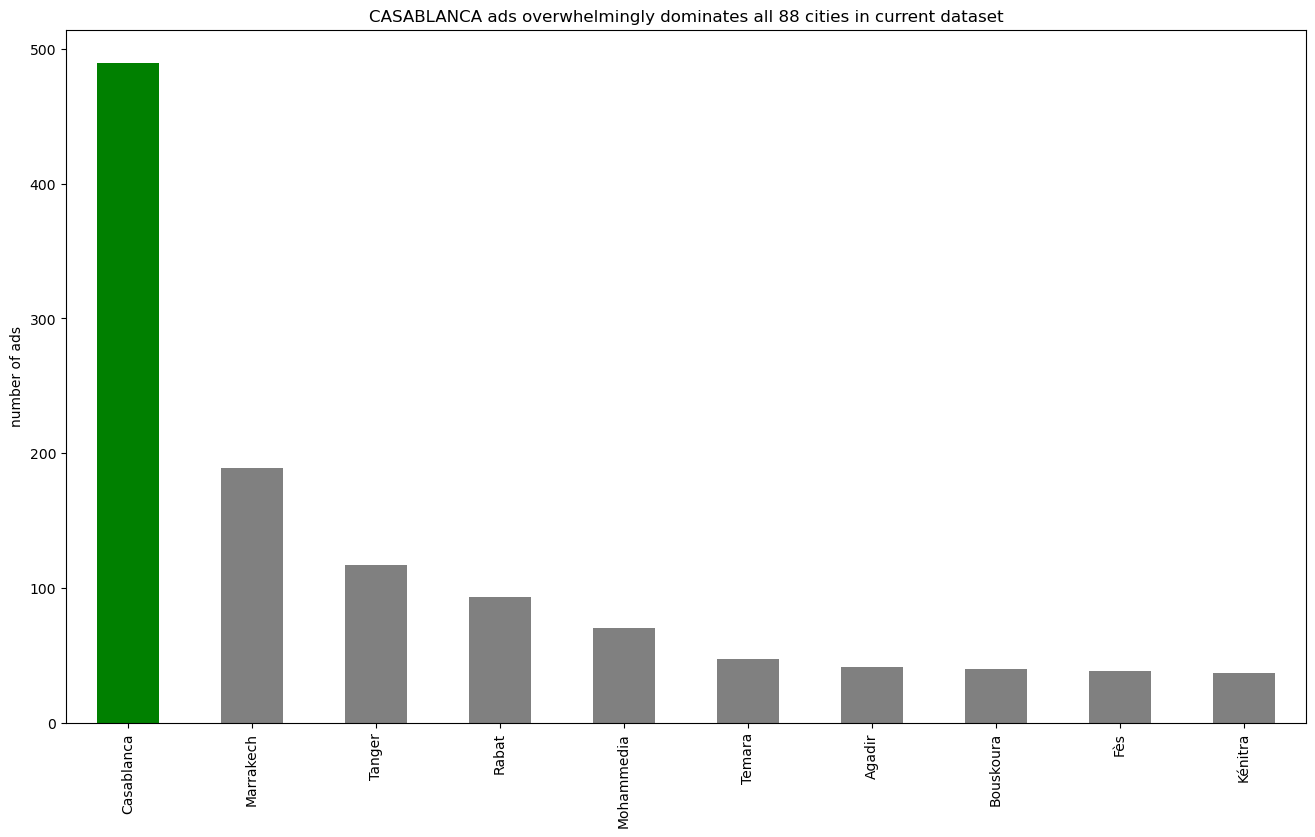

In [87]:
top_10_locations_in_current_dataset = mh_dataset['location'].value_counts().head(10)
colors = ['g'] + ['gray'] * (len(top_10_locations_in_current_dataset)-1)
top_10_locations_in_current_dataset.plot(kind="bar", xlabel='', ylabel='number of ads', color=colors)
plt.title(f'{top_10_locations_in_current_dataset.keys()[0].upper()} ads overwhelmingly dominates all {len(unique_cities)} cities in current dataset')
plt.show()

## 3.9 'description' column cleaning

**Summary :**

- Add two columns for property 'surface' and 'number of rooms'.

In [88]:
mh_dataset['description']

0        100 m² ;3 Pièces;2 Chambres;2 Salles de bains
1            63 m² ;2 Pièces;1 Chambre;1 Salle de bain
2            62 m² ;2 Pièces;1 Chambre;1 Salle de bain
3          124 m² ;5 Pièces;3 Chambres;1 Salle de bain
4          103 m² ;4 Pièces;2 Chambres;1 Salle de bain
                             ...                      
1477                                               NaN
1478                                               NaN
1479                                               NaN
1480                                               NaN
1481                                               NaN
Name: description, Length: 1482, dtype: object

I believe the most meaningful insights from this list of property descriptions are the first two information: 
the surface area and the number of rooms.

So, let's extract these two informations.

In [89]:
def extract_surface(description):
    if isinstance(description, str):
        return int(description.split(";")[0].split()[0])
    return None

In [90]:
mh_dataset['the surface area of the property from the description (m²)'] = mh_dataset['description'].apply(lambda x: extract_surface(x) )

In [91]:
mh_dataset['the surface area of the property from the description (m²)'].describe()

count    432.000000
mean     111.298611
std       67.359796
min       39.000000
25%       74.000000
50%       98.000000
75%      130.000000
max      704.000000
Name: the surface area of the property from the description (m²), dtype: float64

let's compare the results with "the surface area of the property" which we've extracted from title

In [92]:
mh_dataset['the surface area of the property from the title (m²)'].describe()

count     480.000000
mean      184.952083
std       551.283630
min         4.000000
25%        75.000000
50%        95.000000
75%       132.000000
max      9500.000000
Name: the surface area of the property from the title (m²), dtype: float64

75% of the records match, but there are outliers in the surface data extracted from titles. Therefore, we will remove these outliers and retain the most relevant surface data extracted from descriptions.

Note: For records from the Avito website, where we couldn't retrieve the property description, we will keep the surface data extracted from the title for those records.

In [93]:
def choose_property_surface(row_dataframe):
    if row_dataframe['origin_website'] == "mubawab":
        return row_dataframe['the surface area of the property from the description (m²)']
    return row_dataframe['the surface area of the property from the title (m²)']

In [94]:
mh_dataset['surface'] =  mh_dataset.apply(lambda row: choose_property_surface(row), axis=1)

In [95]:
del mh_dataset["the surface area of the property from the description (m²)"]
del mh_dataset["the surface area of the property from the title (m²)"]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

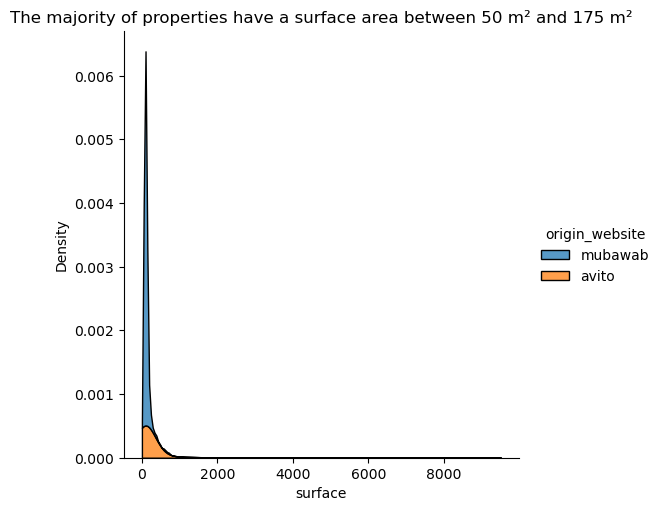

In [96]:
sns.displot(mh_dataset, x='surface', hue='origin_website', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

In [101]:
subset = mh_dataset[mh_dataset['surface'] < 600]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

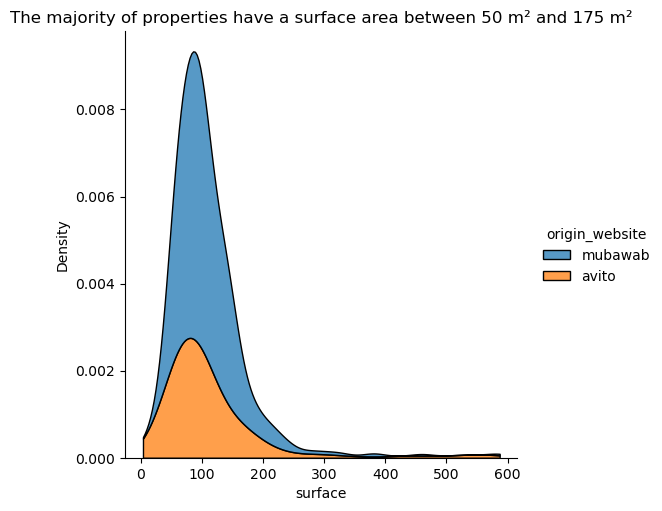

In [102]:
sns.displot(subset, x='surface', hue='origin_website', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

let's extract the number of rooms ...

In [103]:
def extract_number_of_rooms(description):
    if isinstance(description, str):
        return int(description.split(";")[1].split()[0])
    return None

In [104]:
mh_dataset['rooms_number'] = mh_dataset['description'].apply(lambda x: extract_number_of_rooms(x) )

In [105]:
mh_dataset['rooms_number'].describe()

count    432.000000
mean       3.506944
std        4.774735
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       99.000000
Name: rooms_number, dtype: float64

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


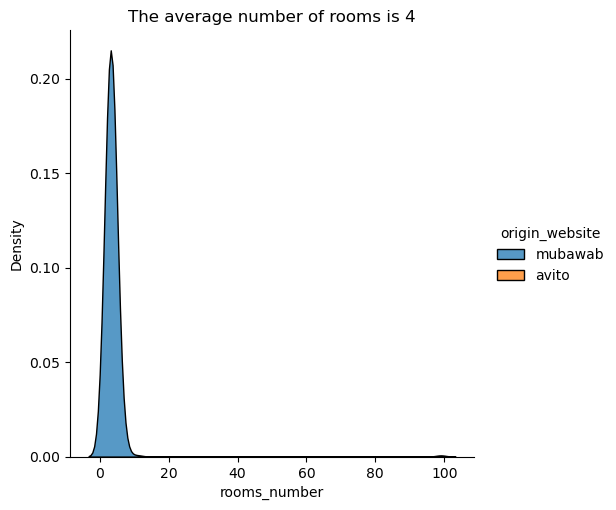

In [107]:
sns.displot(mh_dataset, x='rooms_number', hue='origin_website', kind="kde", multiple="stack")
plt.title("The average number of rooms is 4")
plt.show()

## 3.10 'complete_description' column cleaning

**Summary :**


In [69]:
mh_dataset['complete_description']

0       Si vous êtes à la recherche d’une résidence ca...
1       Studio très haut standing de 63m² dont 9m² de ...
2       studio de standing, idéalement situé au premie...
3       Excellent appartement voisinage agréable pour ...
4       Il est dans le quartier rouidate à quelques mi...
                              ...                        
1477    Nouvelle annonce de Vente d'un appartement à D...
1478    appartement en Vente climatisé chauffage centr...
1479    Des appartements meublés louer par jours au ce...
1480    je met en vente un appartement meublé a Doha m...
1481    A vendre terrain titré non loti, surface 12.8 ...
Name: complete_description, Length: 1482, dtype: object

## 3.11 'features_list' column cleaning

**Summary :**

- Add new column "property type"

In [122]:
sum(mh_dataset['features_list'].isna())

0

In [123]:
mh_dataset['features_list']

0       Type de bien;Appartement;Etat ;Nouveau;Standin...
1       Type de bien;Appartement;Etat ;Nouveau;Etat du...
2       Type de bien;Appartement;Etat ;Nouveau;Etat du...
3       Type de bien;Appartement;Etat ;Bon état;Étage ...
4       Type de bien;Appartement;Etat ;Bon état;Etat d...
                              ...                        
1477    Type;Appartements, à vendre;Secteur;Maarif;Éta...
1478    Type;Appartements, à vendre;Secteur;Hay Riad;S...
1479    Type;Locations de vacances, à louer;Secteur;Ce...
1480    Type;Appartements, à vendre;Secteur;Marjane;Fr...
1481    Type;Terrains et Fermes, à vendre;Secteur;Rout...
Name: features_list, Length: 1482, dtype: object

In [129]:
def extract_property_type(discription):
    if isinstance(discription ,str):
        t = discription.split(";")[1].strip()
        if "," in t:
            return t.split(",")[0].strip()
        return t
    return 'unknown'

In [134]:
mh_dataset['property type'] = mh_dataset['features_list'].apply(lambda x: extract_property_type(x))

In [145]:
unique_property_type_values = mh_dataset['property type'].unique()
unique_property_type_values

array(['Appartement', 'Locations de vacances', 'Terrains et Fermes',
       'Autre Immobilier', 'Maisons et Villas', 'Villas et Riads',
       'Magasins', 'Bureaux et Plateaux', 'Colocations'], dtype=object)

In [138]:
mh_dataset['property type'] = mh_dataset['property type'].apply(lambda x: 'Appartement' if x == 'Appartements' else x)

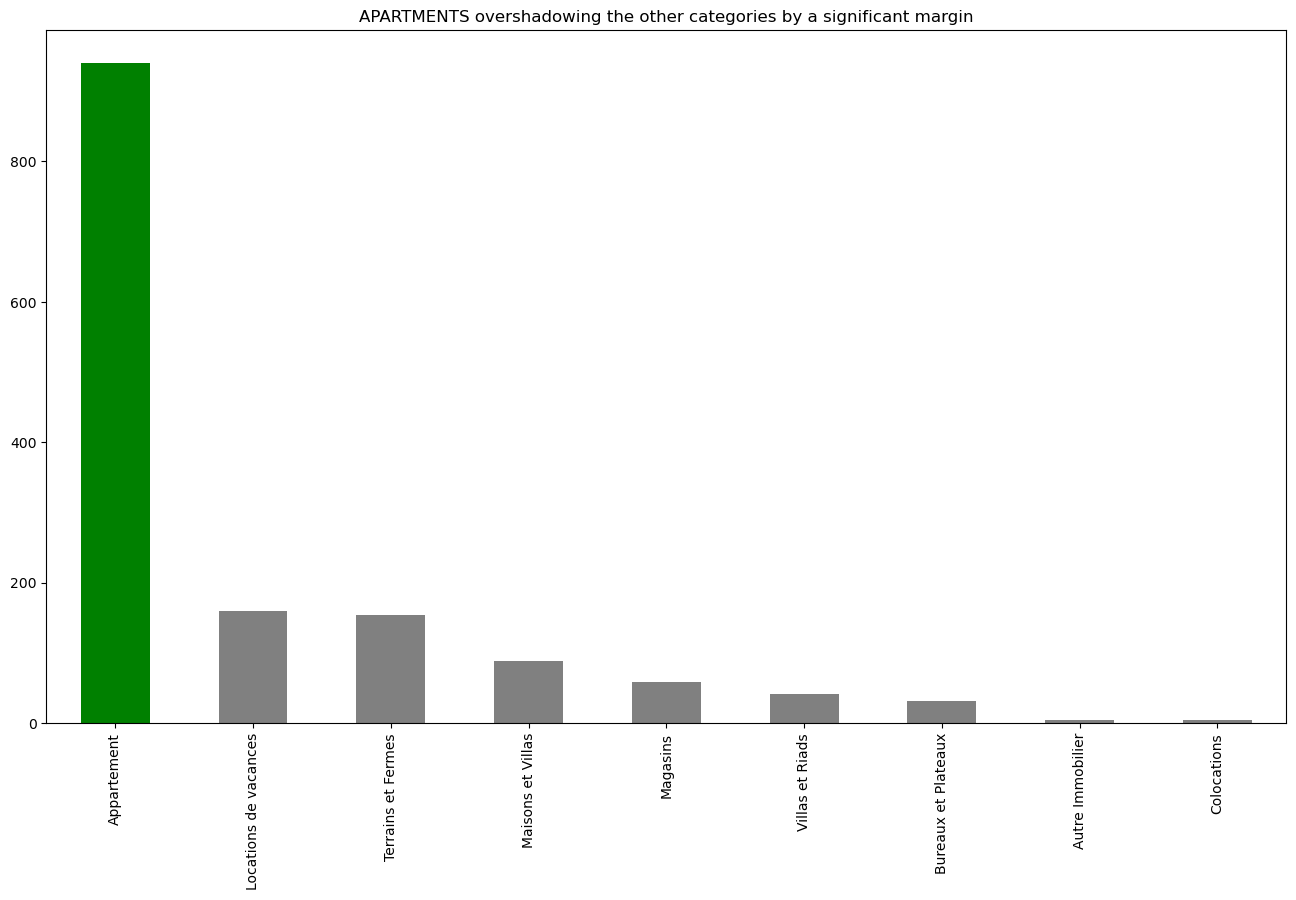

In [146]:
colors = ["g"] + ["gray"] * (len(unique_property_type_values)-1)
mh_dataset['property type'].value_counts().plot(kind="bar", xlabel="", color=colors)
plt.title("APARTMENTS overshadowing the other categories by a significant margin")
plt.show()

# 4. More Cleaning

In [149]:
subset = mh_dataset[["ad category from title", "ad type"]]
subset

,ad category from title,ad type
0,others,unspecified
1,sell,sell
2,others,sell
3,others,sell
4,others,sell
...,...,...
1477,others,sell
1478,sell,unspecified
1479,others,rental
1480,sell,sell


In [150]:
subset['ad type'].unique()

array(['unspecified', 'sell', 'rental'], dtype=object)

In [151]:
subset['ad category from title'].unique()

array(['others', 'sell', 'rental'], dtype=object)

In [155]:
mh_dataset["ad_type"] = subset.apply(lambda row: row['ad category from title'] if row["ad type"] == 'unspecified' else row["ad type"], axis=1)

In [156]:
del mh_dataset['ad type']
del mh_dataset['ad category from title']

In [157]:
mh_dataset.head(2)

,advertisement_url,title,publication_date,location,description,complete_description,features_list,insert_date,origin_website,year of publication,month of publication,day of publication,property price,price currency,price per priod (for rental ad),surface,rooms_number,property type,ad_type
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,2024,5,17,NaN,None,NaN,100.0,3.0,Appartement,others
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,2024-05-17,Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,2024,5,17,1450000.0,DH,NaN,63.0,2.0,Appartement,sell


we are going to get ride of columns that are useless for future analysis.

- title
- description
- complete_description
- features_list
- insert_date

In [160]:
del mh_dataset["title"]
del mh_dataset["description"]
del mh_dataset["complete_description"]
del mh_dataset["features_list"]
del mh_dataset["insert_date"]

we gonna rename our columns :

In [161]:
mh_dataset.columns

Index(['advertisement_url', 'publication_date', 'location', 'origin_website',
       'year of publication', 'month of publication', 'day of publication',
       'property price', 'price currency', 'price per priod (for rental ad)',
       'surface', 'rooms_number', 'property type', 'ad_type'],
      dtype='object')

In [162]:
columns = [
    'url',
    'ad_date',
    'location',
    'platform_name',
    'ad_year',
    'ad_month',
    'ad_day',
    'price',
    'currency',
    'period_(for rental ads)',
    'surface',
    'rooms_number',
    'property_type',
    'ad_type',
]

In [163]:
mh_dataset.columns = columns

In [164]:
mh_dataset

,url,ad_date,location,platform_name,ad_year,ad_month,ad_day,price,currency,period_(for rental ads),surface,rooms_number,property_type,ad_type
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,2024-05-17,Asilah,mubawab,2024,5,17,NaN,None,NaN,100.0,3.0,Appartement,others
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,2024-05-17,Casablanca,mubawab,2024,5,17,1450000.0,DH,NaN,63.0,2.0,Appartement,sell
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,2024-05-17,Casablanca,mubawab,2024,5,17,7800.0,DH,NaN,62.0,2.0,Appartement,sell
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,2024-05-17,Casablanca,mubawab,2024,5,17,1500000.0,DH,NaN,124.0,5.0,Appartement,sell
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,2024-05-17,Marrakech,mubawab,2024,5,17,1200000.0,DH,NaN,103.0,4.0,Appartement,sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,https://www.avito.ma/fr/maarif/appartements/43...,2024-05-19,Casablanca,avito,2024,5,19,2950000.0,DH,NaN,166.0,NaN,Appartement,sell
1478,https://www.avito.ma/fr/hay_riad/appartements/...,2024-05-19,Rabat,avito,2024,5,19,NaN,None,NaN,178.0,NaN,Appartement,sell
1479,https://www.avito.ma/fr/centre_ville/locations...,2024-05-19,Tanger,avito,2024,5,19,350.0,DH,Nuit,NaN,NaN,Locations de vacances,rental
1480,https://www.avito.ma/fr/marjane/appartements/a...,2024-05-19,Tanger,avito,2024,5,19,400000.0,DH,NaN,NaN,NaN,Appartement,sell


In [166]:
# mh_dataset.to_csv('market_housing_dateset.csv')